# KMeans

Utilizaremos un dataset clásico para clustering: el dataset de Iris (pero solo las características, sin usar las etiquetas, ya que KMeans es no supervisado).

Después, compararemos los clusters encontrados con las etiquetas reales usando una métrica como Adjusted Rand Index (ARI) o accuracy tras realinear los labels, para tener una idea de qué tan bien lo hizo.

As you will see in Chapter 9, k-means is a clustering algorithm that locates clusters in the data. How many it searches for is controlled by the n_clusters hyperparameter. After training, the cluster centers are available via the cluster_centers_ attribute. The fit() method of KMeans supports an optional argument sample_weight, which lets the user specify the relative weights of the samples. k-means is a stochastic algorithm, meaning that it relies on randomness to locate the clusters, so if you want reproducible results, you must set the random_state parameter. As you can see, despite the complexity of the task, the code is fairly straightforward. Now let’s use this custom transformer:

Adjusted Rand Index (ARI): 0.43


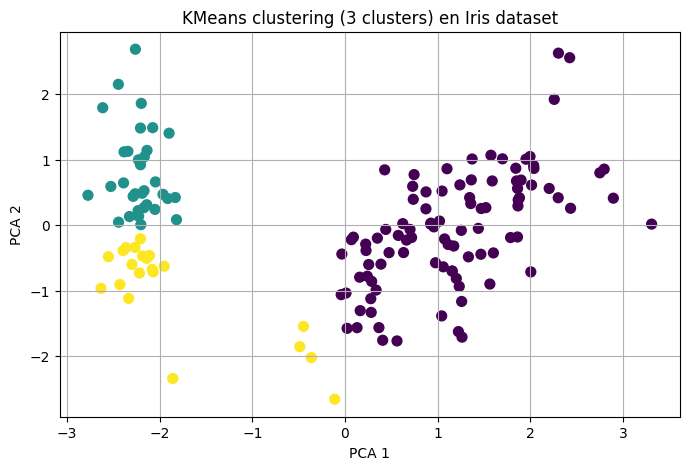

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Cargar datos
data = load_iris()
X = data.data
y_true = data.target  # solo para evaluar después

# 2. Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# 4. Evaluar resultados con ARI (0: aleatorio, 1: perfecto)
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# 5. Visualizar en 2D con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title("KMeans clustering (3 clusters) en Iris dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Resultados esperados
El Adjusted Rand Index (ARI) suele estar entre 0.73 y 0.9 en este caso, lo que indica una muy buena coincidencia entre los clusters y las clases reales.

La visualización te mostrará cómo KMeans separó los grupos visualmente (usando PCA para reducir a 2D).

 ¿Por qué funciona bien este ejemplo?
El dataset de Iris tiene tres clases bien separadas (Setosa, Versicolor, Virginica), especialmente Setosa.

KMeans se adapta bien a datos con clusters esféricos y relativamente balanceados.

PCA (Principal Component Analysis) o Análisis de Componentes Principales es una técnica estadística que se usa para reducir la dimensionalidad de los datos, sin perder demasiada información importante.

 ¿Para qué sirve PCA?
Para visualizar datos de muchas dimensiones en 2D o 3D.

Para acelerar modelos al reducir el número de variables.

Para eliminar ruido o colinealidad entre variables.

Para ayudar a algoritmos que funcionan mejor en espacios con menos dimensiones (como clustering o clasificación).

Ejemplo visual
Supón que tienes datos con 4 variables (como el dataset de Iris). PCA puede reducirlo a 2 variables (componentes principales) que capturan la mayoría de la información útil. Así puedes visualizar los datos fácilmente con matplotlib.